## Imports

In [81]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
import os
import tqdm
from tqdm import tqdm
import time
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import collections
import community as community_louvain 
pd.set_option('future.no_silent_downcasting', True)

In [82]:
! pip install python-louvain

## Data Preprocessing

### Required Functions

In [83]:
def preprocess(df):
    df['CITY 1'] = df['CITY 1'].str.upper();
    df['CITY 2'] = df['CITY 2'].str.upper();
    df['CITY 1'] = df['CITY 1'].str.strip();
    df['CITY 1'] = df['CITY 1'].str.rstrip();
    df['CITY 2'] = df['CITY 2'].str.strip();
    df['CITY 2'] = df['CITY 2'].str.rstrip();
    df.replace('-', 0, inplace=True);
    df.replace('DEOGHAR AIRPORT', 'DEOGHAR', inplace=True);
    df.replace('HOLLONGI AIRPORT, ITANAGAR', 'ITANAGAR', inplace=True);
    df.replace('KUSHINAGAR', 'KUSHINAGAR INTERNATIONAL AIRPORT', inplace=True);
    df.replace('BIDAR AIRPORT, KARN', 'BIDAR AIRPORT, KARNATAKA', inplace=True);
    df.replace('KALABURAGI, KARNAT', 'KALABURAGI, KARNATAKA', inplace=True);
    df.replace('Itanagar', 'ITANAGAR', inplace=True);
    df.replace('PUDUCHERRY', 'PONDICHERRY', inplace=True);
    df['PASSENGERS FROM CITY 2'] = df['PASSENGERS FROM CITY 2'].astype(int);
    df['PASSENGERS TO CITY 2'] = df['PASSENGERS TO CITY 2'].astype(int);
    
    return None

In [84]:
def graphi_format(df) -> pd.DataFrame:
    df1 = df.copy()
    df2 = df1.copy()
    
    df1.drop(columns=['PASSENGERS FROM CITY 2'], inplace=True)
    df2['CITY 1'], df2['CITY 2'] = df2['CITY 2'], df2['CITY 1']
    
    df2.drop(columns=['PASSENGERS TO CITY 2'], inplace=True)
    df2.rename(columns={'PASSENGERS FROM CITY 2': 'PASSENGERS TO CITY 2'}, inplace=True)
    
    return  pd.concat([df1, df2], ignore_index=True)

### 2023

In [85]:
jan2023_data = pd.read_excel('IndianAirways2023/JAN2023.xlsx')
feb2023_data = pd.read_excel('IndianAirways2023/FEB2023.xlsx')
mar2023_data = pd.read_excel('IndianAirways2023/MAR2023.xlsx')
apr2023_data = pd.read_excel('IndianAirways2023/APR2023.xlsx')
may2023_data = pd.read_excel('IndianAirways2023/MAY2023.xlsx')
jun2023_data = pd.read_excel('IndianAirways2023/JUN2023.xlsx')
jul2023_data = pd.read_excel('IndianAirways2023/JUL2023.xlsx')
aug2023_data = pd.read_excel('IndianAirways2023/AUG2023.xlsx')
sep2023_data = pd.read_excel('IndianAirways2023/SEP2023.xlsx')
oct2023_data = pd.read_excel('IndianAirways2023/OCT2023.xlsx')
nov2023_data = pd.read_excel('IndianAirways2023/NOV2023.xlsx')
dec2023_data = pd.read_excel('IndianAirways2023/DEC2023.xlsx')

data2023_list = [jan2023_data, feb2023_data, mar2023_data, apr2023_data, may2023_data, jun2023_data, jul2023_data, aug2023_data, sep2023_data, oct2023_data, nov2023_data, dec2023_data]
for data in data2023_list:
    preprocess(data)

combined2023_data = pd.concat([data for data in data2023_list])
combined2023_data = combined2023_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2023_list.append(combined2023_data)

data2023_list_graphi_format = [graphi_format(data) for data in data2023_list]

### 2022

In [86]:
jan2022_data = pd.read_excel('IndianAirways2022/JAN2022.xlsx')
feb2022_data = pd.read_excel('IndianAirways2022/FEB2022.xlsx')
mar2022_data = pd.read_excel('IndianAirways2022/MAR2022.xlsx')
apr2022_data = pd.read_excel('IndianAirways2022/APR2022.xlsx')
may2022_data = pd.read_excel('IndianAirways2022/MAY2022.xlsx')
jun2022_data = pd.read_excel('IndianAirways2022/JUN2022.xlsx')
jul2022_data = pd.read_excel('IndianAirways2022/JUL2022.xlsx')
aug2022_data = pd.read_excel('IndianAirways2022/AUG2022.xlsx')
sep2022_data = pd.read_excel('IndianAirways2022/SEP2022.xlsx')
oct2022_data = pd.read_excel('IndianAirways2022/OCT2022.xlsx')
nov2022_data = pd.read_excel('IndianAirways2022/NOV2022.xlsx')
dec2022_data = pd.read_excel('IndianAirways2022/DEC2022.xlsx')

data2022_list = [jan2022_data, feb2022_data, mar2022_data, apr2022_data, may2022_data, jun2022_data, jul2022_data, aug2022_data, sep2022_data, oct2022_data, nov2022_data, dec2022_data]
for data in data2022_list:
    preprocess(data)
    
combined2022_data = pd.concat([data for data in data2022_list])
combined2022_data = combined2022_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2022_list.append(combined2022_data)

data2022_list_graphi_format = [graphi_format(data) for data in data2022_list]

### 2021

In [87]:
jan2021_data = pd.read_excel('IndianAirways2021/JAN2021.xlsx')
feb2021_data = pd.read_excel('IndianAirways2021/FEB2021.xlsx')
mar2021_data = pd.read_excel('IndianAirways2021/MAR2021.xlsx')
apr2021_data = pd.read_excel('IndianAirways2021/APR2021.xlsx')
may2021_data = pd.read_excel('IndianAirways2021/MAY2021.xlsx')
jun2021_data = pd.read_excel('IndianAirways2021/JUN2021.xlsx')
jul2021_data = pd.read_excel('IndianAirways2021/JUL2021.xlsx')
aug2021_data = pd.read_excel('IndianAirways2021/AUG2021.xlsx')
sep2021_data = pd.read_excel('IndianAirways2021/SEP2021.xlsx')
oct2021_data = pd.read_excel('IndianAirways2021/OCT2021.xlsx')
nov2021_data = pd.read_excel('IndianAirways2021/NOV2021.xlsx')
dec2021_data = pd.read_excel('IndianAirways2021/DEC2021.xlsx')

data2021_list = [jan2021_data, feb2021_data, mar2021_data, apr2021_data, may2021_data, jun2021_data, jul2021_data, aug2021_data, sep2021_data, oct2021_data, nov2021_data, dec2021_data]
for data in data2021_list:
    preprocess(data)
    
combined2021_data = pd.concat([data for data in data2021_list])
combined2021_data = combined2021_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2021_list.append(combined2021_data)

data2021_list_graphi_format = [graphi_format(data) for data in data2021_list]

### 2020

In [88]:
jan2020_data = pd.read_excel('IndianAirways2020/JAN2020.xlsx')
feb2020_data = pd.read_excel('IndianAirways2020/FEB2020.xlsx')
mar2020_data = pd.read_excel('IndianAirways2020/MAR2020.xlsx')
apr2020_data = pd.read_excel('IndianAirways2020/APR2020.xlsx')
may2020_data = pd.read_excel('IndianAirways2020/MAY2020.xlsx')
jun2020_data = pd.read_excel('IndianAirways2020/JUN2020.xlsx')
jul2020_data = pd.read_excel('IndianAirways2020/JUL2020.xlsx')
aug2020_data = pd.read_excel('IndianAirways2020/AUG2020.xlsx')
sep2020_data = pd.read_excel('IndianAirways2020/SEP2020.xlsx')
oct2020_data = pd.read_excel('IndianAirways2020/OCT2020.xlsx')
nov2020_data = pd.read_excel('IndianAirways2020/NOV2020.xlsx')
dec2020_data = pd.read_excel('IndianAirways2020/DEC2020.xlsx')

data2020_list = [jan2020_data, feb2020_data, mar2020_data, apr2020_data, may2020_data, jun2020_data, jul2020_data, aug2020_data, sep2020_data, oct2020_data, nov2020_data, dec2020_data]
for data in data2020_list:
    preprocess(data)
    
combined2020_data = pd.concat([data for data in data2020_list])
combined2020_data = combined2020_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2020_list.append(combined2020_data)

data2020_list_graphi_format = [graphi_format(data) for data in data2020_list]

### 2019

In [89]:
jan2019_data = pd.read_excel('IndianAirways2019/JAN2019.xlsx')
feb2019_data = pd.read_excel('IndianAirways2019/FEB2019.xlsx')
mar2019_data = pd.read_excel('IndianAirways2019/MAR2019.xlsx')
apr2019_data = pd.read_excel('IndianAirways2019/APR2019.xlsx')
may2019_data = pd.read_excel('IndianAirways2019/MAY2019.xlsx')
jun2019_data = pd.read_excel('IndianAirways2019/JUN2019.xlsx')
jul2019_data = pd.read_excel('IndianAirways2019/JUL2019.xlsx')
aug2019_data = pd.read_excel('IndianAirways2019/AUG2019.xlsx')
sep2019_data = pd.read_excel('IndianAirways2019/SEP2019.xlsx')
oct2019_data = pd.read_excel('IndianAirways2019/OCT2019.xlsx')
nov2019_data = pd.read_excel('IndianAirways2019/NOV2019.xlsx')
dec2019_data = pd.read_excel('IndianAirways2019/DEC2019.xlsx')

data2019_list = [jan2019_data, feb2019_data, mar2019_data, apr2019_data, may2019_data, jun2019_data, jul2019_data, aug2019_data, sep2019_data, oct2019_data, nov2019_data, dec2019_data]
for data in data2019_list:
    preprocess(data)
    
combined2019_data = pd.concat([data for data in data2019_list])
combined2019_data = combined2019_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2019_list.append(combined2019_data)

data2019_list_graphi_format = [graphi_format(data) for data in data2019_list]

### 2018

In [90]:
jan2018_data = pd.read_excel('IndianAirways2018/JAN2018.xlsx')
feb2018_data = pd.read_excel('IndianAirways2018/FEB2018.xlsx')
mar2018_data = pd.read_excel('IndianAirways2018/MAR2018.xlsx')
apr2018_data = pd.read_excel('IndianAirways2018/APR2018.xlsx')
may2018_data = pd.read_excel('IndianAirways2018/MAY2018.xlsx')
jun2018_data = pd.read_excel('IndianAirways2018/JUN2018.xlsx')
jul2018_data = pd.read_excel('IndianAirways2018/JUL2018.xlsx')
aug2018_data = pd.read_excel('IndianAirways2018/AUG2018.xlsx')
sep2018_data = pd.read_excel('IndianAirways2018/SEP2018.xlsx')
oct2018_data = pd.read_excel('IndianAirways2018/OCT2018.xlsx')
nov2018_data = pd.read_excel('IndianAirways2018/NOV2018.xlsx')
dec2018_data = pd.read_excel('IndianAirways2018/DEC2018.xlsx')

data2018_list = [jan2018_data, feb2018_data, mar2018_data, apr2018_data, may2018_data, jun2018_data, jul2018_data, aug2018_data, sep2018_data, oct2018_data, nov2018_data, dec2018_data]
for data in data2018_list:
    preprocess(data)
    
combined2018_data = pd.concat([data for data in data2018_list])
combined2018_data = combined2018_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2018_list.append(combined2018_data)

data2018_list_graphi_format = [graphi_format(data) for data in data2018_list]

### 2017

In [91]:
jan2017_data = pd.read_excel('IndianAirways2017/JAN2017.xlsx')
feb2017_data = pd.read_excel('IndianAirways2017/FEB2017.xlsx')
mar2017_data = pd.read_excel('IndianAirways2017/MAR2017.xlsx')
apr2017_data = pd.read_excel('IndianAirways2017/APR2017.xlsx')
may2017_data = pd.read_excel('IndianAirways2017/MAY2017.xlsx')
jun2017_data = pd.read_excel('IndianAirways2017/JUN2017.xlsx')
jul2017_data = pd.read_excel('IndianAirways2017/JUL2017.xlsx')
aug2017_data = pd.read_excel('IndianAirways2017/AUG2017.xlsx')
sep2017_data = pd.read_excel('IndianAirways2017/SEP2017.xlsx')
oct2017_data = pd.read_excel('IndianAirways2017/OCT2017.xlsx')
nov2017_data = pd.read_excel('IndianAirways2017/NOV2017.xlsx')
dec2017_data = pd.read_excel('IndianAirways2017/DEC2017.xlsx')

data2017_list = [jan2017_data, feb2017_data, mar2017_data, apr2017_data, may2017_data, jun2017_data, jul2017_data, aug2017_data, sep2017_data, oct2017_data, nov2017_data, dec2017_data]
for data in data2017_list:
    preprocess(data)
    
combined2017_data = pd.concat([data for data in data2017_list])
combined2017_data = combined2017_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2017_list.append(combined2017_data)

data2017_list_graphi_format = [graphi_format(data) for data in data2017_list]

### 2016

In [92]:
jan2016_data = pd.read_excel('IndianAirways2016/JAN2016.xlsx')
feb2016_data = pd.read_excel('IndianAirways2016/FEB2016.xlsx')
mar2016_data = pd.read_excel('IndianAirways2016/MAR2016.xlsx')
apr2016_data = pd.read_excel('IndianAirways2016/APR2016.xlsx')
may2016_data = pd.read_excel('IndianAirways2016/MAY2016.xlsx')
jun2016_data = pd.read_excel('IndianAirways2016/JUN2016.xlsx')
jul2016_data = pd.read_excel('IndianAirways2016/JUL2016.xlsx')
aug2016_data = pd.read_excel('IndianAirways2016/AUG2016.xlsx')
sep2016_data = pd.read_excel('IndianAirways2016/SEP2016.xlsx')
oct2016_data = pd.read_excel('IndianAirways2016/OCT2016.xlsx')
nov2016_data = pd.read_excel('IndianAirways2016/NOV2016.xlsx')
dec2016_data = pd.read_excel('IndianAirways2016/DEC2016.xlsx')

data2016_list = [jan2016_data, feb2016_data, mar2016_data, apr2016_data, may2016_data, jun2016_data, jul2016_data, aug2016_data, sep2016_data, oct2016_data, nov2016_data, dec2016_data]
for data in data2016_list:
    preprocess(data)
    
combined2016_data = pd.concat([data for data in data2016_list])
combined2016_data = combined2016_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2016_list.append(combined2016_data)

data2016_list_graphi_format = [graphi_format(data) for data in data2016_list]

### 2015

In [93]:
apr2015_data = pd.read_excel('IndianAirways2015/APR2015.xlsx')
may2015_data = pd.read_excel('IndianAirways2015/MAY2015.xlsx')
jun2015_data = pd.read_excel('IndianAirways2015/JUN2015.xlsx')
jul2015_data = pd.read_excel('IndianAirways2015/JUL2015.xlsx')
aug2015_data = pd.read_excel('IndianAirways2015/AUG2015.xlsx')
sep2015_data = pd.read_excel('IndianAirways2015/SEP2015.xlsx')
oct2015_data = pd.read_excel('IndianAirways2015/OCT2015.xlsx')
nov2015_data = pd.read_excel('IndianAirways2015/NOV2015.xlsx')
dec2015_data = pd.read_excel('IndianAirways2015/DEC2015.xlsx')

data2015_list = [apr2015_data, may2015_data, jun2015_data, jul2015_data, aug2015_data, sep2015_data, oct2015_data, nov2015_data, dec2015_data]
for data in data2015_list:
    preprocess(data)
    
combined2015_data = pd.concat([data for data in data2015_list])
combined2015_data = combined2015_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2015_list.append(combined2015_data)

data2015_list_graphi_format = [graphi_format(data) for data in data2015_list]

### Assigning IDs, Latitude, and Longitude to the cities, and GeoPandas Geometry

In [94]:
data_for_ID = pd.concat([data2023_list_graphi_format[-1], data2022_list_graphi_format[-1], data2021_list_graphi_format[-1], data2020_list_graphi_format[-1], data2019_list_graphi_format[-1], data2018_list_graphi_format[-1], data2017_list_graphi_format[-1], data2016_list_graphi_format[-1], data2015_list_graphi_format[-1]])
data_for_ID = data_for_ID.groupby(['CITY 1', 'CITY 2']).sum().reset_index()

unique_places = data_for_ID['CITY 1'].unique()
place_to_ID_dict = {place: ID for ID, place in enumerate(unique_places)}
ID_to_place_dict = {ID: place for place, ID in place_to_ID_dict.items()}

# place_to_ID_dict, ID_to_place_dict

In [95]:
# region
places_coordinates = {'AGARTALA': (23.8315, 91.2868), 'AGATTI ISLAND': (10.8231, 72.1768), 'AGRA': (27.1767, 78.0081), 'AHMEDABAD': (23.0225, 72.5714), 'AIZAWL': (23.7271, 92.7176), 'KISHANGARH': (26.5758, 74.8402), 'ALLAHABAD': (25.4358, 81.8463), 'AMRITSAR': (31.7055, 74.8023), 'AURANGABAD': (19.8762, 75.3433), 'BAGDOGRA': (26.6831, 88.3285), 'BAREILLY': (28.367, 79.4304), 'BELGAUM': (15.862, 74.5085), 'BENGALURU': (12.9716, 77.5946), 'BHAVNAGAR': (21.7645, 72.1519), 'BHOPAL': (23.2599, 77.4126), 'BHUBANESWAR': (20.2961, 85.8245), 'BHUJ': (23.2531, 69.6693), 'BIKANER': (28.0229, 73.3119), 'BILASPUR': (22.0807, 82.15), 'MUMBAI': (19.076, 72.8777), 'CHANDIGARH': (30.7333, 76.7794), 'CHENNAI': (13.0827, 80.2707), 'KOCHI': (9.9312, 76.2673), 'COIMBATORE': (11.0168, 76.9558), 'DABOLIM': (15.3801, 73.8341), 'DARBHANGA': (26.1522, 85.896), 'DEHRADUN': (30.3165, 78.0322), 'DELHI': (28.6139, 77.209), 'DEOGHAR': (24.482, 86.6956), 'DHARAMSALA': (32.219, 76.3234), 'DIBRUGARH': (27.4728, 94.9119), 'DIMAPUR': (25.7951, 93.9501), 'DURGAPUR': (23.5505, 87.2885), 'GAYA': (24.7964, 85.0077), 'GHAZIABAD': (28.6692, 77.4538), 'GORAKHPUR': (26.7606, 83.3732), 'GUWAHATI': (26.1445, 91.7362), 'GWALIOR': (26.2183, 78.1828), 'HUBLI': (15.3647, 75.1239), 'HYDERABAD': (17.385, 78.4867), 'IMPHAL': (24.817, 93.9368), 'INDORE': (22.7196, 75.8577), 'JABALPUR': (23.1815, 79.9864), 'JAGDALPUR': (19.0822, 82.0212), 'JAIPUR': (26.9124, 75.7873), 'JAMMU': (32.7266, 74.857), 'JAMSHEDPUR': (22.8056, 86.1711), 'JEYPORE': (18.8564, 82.5644), 'JHARSUGUDA': (21.868, 84.0222), 'JODHPUR': (26.2389, 73.0243), 'JORHAT': (26.7465, 94.202), 'CUDDAPAH': (14.4786, 78.8236), 'KALABURAGI': (17.3297, 76.8372), 'KANNUR': (11.8745, 75.3704), 'KOLHAPUR': (16.705, 74.2433), 'KOLKATA': (22.5726, 88.3639), 'KULLU': (31.9566, 77.1095), 'KURNOOL': (15.8281, 78.0373), 'LEH': (34.1526, 77.5771), 'LILABARI': (27.2955, 94.0977), 'LUCKNOW': (26.8467, 80.9462), 'MADURAI': (9.9252, 78.1198), 'MANGALORE': (12.9141, 74.856), 'NAGPUR': (21.1458, 79.0882), 'PASIGHAT': (28.0665, 95.3269), 'PATNA': (25.5941, 85.1376), 'PORT BLAIR': (11.6234, 92.7265), 'PUNE': (18.5204, 73.8567), 'RAIPUR': (21.2514, 81.6296), 'RAJAHMUNDRY': (17.6868, 83.2185), 'RANCHI': (23.3441, 85.3096), 'SHILLONG': (25.5788, 91.8933), 'SHIRDI': (19.7515, 74.4773), 'SRINAGAR': (34.0837, 74.7973), 'TIRUPATI': (13.6288, 79.4192), 'VARANASI': (25.3176, 82.9739), 'VIJAYAWADA': (16.5062, 80.648), 'GOA': (15.2993, 74.124), 'AJMER': (26.4499, 74.6399), 'COOCH BEHAR': (26.3254, 89.4414), 'DEHRA DUN': (30.3165, 78.0322), 'ITANAGAR': (27.0978, 93.6237), 'KADAPA': (14.4674, 78.8242), 'MOPA, GOA': (15.3888, 73.8335), 'Mopa, Goa': (15.3888, 73.8335), 'DIU': (20.7141, 70.9822), 'SURAT': (21.1702, 72.8311), 'KANPUR': (26.4499, 80.3319), 'RAJKOT': (22.3039, 70.8022), 'SHIVAMOGGA AIRPORT': (13.3986, 74.7421), 'BHATINDA': (30.1709, 74.9153), 'RAJKOT INTERNATIONAL AIRPORT': (22.3039, 70.8022), 'ADAMPUR': (31.4332, 75.758), 'KHAJURAHO': (24.817, 79.9342), 'UTKELA': (20.1463, 83.1822), 'JAISALMER': (26.9155, 70.9083), 'JAMNAGAR': (22.4707, 70.0577), 'KANDLA': (23.0046, 70.2167), 'KESHOD': (21.3177, 70.271), 'KOZHIKODE': (11.2588, 75.7804), 'MALVAN': (16.0662, 73.4665), 'GONDIA': (21.4602, 80.192), 'KADAPA': (14.4674, 78.8242), 'VISAKHAPATNAM': (17.6868, 83.2185), 'TRIVANDRUM': (8.5241, 76.9366), 'UDAIPUR': (24.5854, 73.7125), 'VADODARA': (22.3072, 73.1812), 'BIDAR': (17.9133, 77.5301), 'SILCHAR': (24.8278, 92.797), 'TIRUCHIRAPALLY': (10.7905, 78.7047), 'TUTICORIN': (8.7642, 78.1348), 'VIDYANAGAR': (15.389, 75.091), 'NASIK': (19.9975, 73.7898), 'PONDICHERRY': (11.9416, 79.8083), 'SILCHAR': (24.8278, 92.797), 'ROURKELA': (22.2604, 84.8536), 'MYSORE': (12.2958, 76.6394), 'PANTNAGAR': (29.0328, 79.4737), 'SIMLA': (31.1048, 77.1734), 'TEZU': (27.9161, 96.161), 'RUPSI': (26.1511, 89.9652), 'TEZPUR': (26.7095, 92.7917), 'ZIRO': (27.5564, 93.8287), 'SINDHUDURG AIRPORT': (16.2391, 73.649), 'KUSHINAGAR INTERNATIONAL AIRPORT': (26.7401, 83.3706), 'PAKYONG': (27.3325, 88.6159), 'UTTARLAI': (25.8036, 71.4104), 'ZERO AIRPORT': (27.5915, 93.8287), 'LUDHIANA': (30.901, 75.8573), 'SALEM': (11.6643, 78.146), 'AYODHYA INTERNATIONAL AIRPORT': (26.7271, 82.1829), 'JALGAON': (20.9622, 75.6267), 'KALABURAGI, KARNATAKA': (17.3078, 76.9581), 'PORBANDAR': ( 21.6405, 69.6059), 'NANDED': (19.1833, 77.3167), 'PATHANKOT': (32.2336, 75.6344), 'BIDAR AIRPORT, KARNATAKA': (17.9064, 77.4832), 'GONDIA AIRPORT': (21.5261, 80.2903), 'HISSAR': (29.1794, 75.7553), 'MUNDRA': (22.8348, 69.7654), 'PITHORAGARH': (29.5936, 80.2392), 'GANGTOK': (27.3389, 88.6065), 'COCHIN': (9.9312, 76.2673)}
# endregion

In [96]:
for year_data in [data2023_list, data2022_list, data2021_list, data2020_list, data2019_list, data2018_list, data2017_list, data2016_list, data2015_list,data2023_list_graphi_format, data2022_list_graphi_format, data2021_list_graphi_format, data2020_list_graphi_format, data2019_list_graphi_format, data2018_list_graphi_format, data2017_list_graphi_format, data2016_list_graphi_format, data2015_list_graphi_format]:
    for month_data in year_data:
        month_data['CITY 1 ID'] = month_data['CITY 1'].apply(lambda x: place_to_ID_dict[x])
        month_data['CITY 2 ID'] = month_data['CITY 2'].apply(lambda x: place_to_ID_dict[x])
        month_data['LATITUDE 1'] = month_data['CITY 1'].apply(lambda x: places_coordinates[x][0])
        month_data['LONGITUDE 1'] = month_data['CITY 1'].apply(lambda x: places_coordinates[x][1])
        month_data['LATITUDE 2'] = month_data['CITY 2'].apply(lambda x: places_coordinates[x][0])
        month_data['LONGITUDE 2'] = month_data['CITY 2'].apply(lambda x: places_coordinates[x][1])
        geometry1 = [Point(xy) for xy in zip(month_data['LONGITUDE 1'], month_data['LATITUDE 1'])]
        geometry2 = [Point(xy) for xy in zip(month_data['LONGITUDE 2'], month_data['LATITUDE 2'])]
        month_data['GEOMETRY CITY 1'] = geometry1
        month_data['GEOMETRY CITY 2'] = geometry2
        

In [97]:
# combined2023_data[combined2023_data['CITY 1'] == "BHUBANESWAR"]
# data2022_list_graphi_format[-1][data2022_list_graphi_format[-1]['CITY 2'] == "BHUBANESWAR"]

In [98]:
len(places_coordinates)

141

### Making the Networks

In [99]:
apr2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

jan2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
feb2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
mar2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
apr2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

jan2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
feb2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
mar2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
apr2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

jan2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
feb2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
mar2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
apr2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

jan2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
feb2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
mar2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
apr2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

jan2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
feb2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
mar2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
apr2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

jan2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
feb2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
mar2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
apr2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

jan2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
feb2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
mar2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
apr2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

jan2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
feb2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
mar2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
apr2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
may2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jun2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
jul2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
aug2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
sep2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
oct2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
nov2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
dec2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())
year2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'], create_using=nx.DiGraph())

## Actual Work

In [100]:
india = gpd.read_file(r'Maps_with_python-master/india-polygon.shp')

# Find maximum number of passengers in a in any given month and year separately
max_passengers_2015_monthwise = [max(data2015_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(8)]
max_passengers_2016_monthwise = [max(data2016_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2017_monthwise = [max(data2017_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2018_monthwise = [max(data2018_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2019_monthwise = [max(data2019_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2020_monthwise = [max(data2020_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2021_monthwise = [max(data2021_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2022_monthwise = [max(data2022_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2023_monthwise = [max(data2023_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]

max_passengers_2015 = max(data2015_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2016 = max(data2016_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2017 = max(data2017_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2018 = max(data2018_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2019 = max(data2019_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2020 = max(data2020_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2021 = max(data2021_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2022 = max(data2022_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2023 = max(data2023_list_graphi_format[-1]['PASSENGERS TO CITY 2'])

max_passengers = max(max_passengers_2015, max_passengers_2016, max_passengers_2017, max_passengers_2018, max_passengers_2019, max_passengers_2020, max_passengers_2021, max_passengers_2022, max_passengers_2023)

print("Maximum number of passengers in 2015 monthwise are: ", max_passengers_2015_monthwise)
print("Maximum number of passengers in 2016 monthwise are: ", max_passengers_2016_monthwise)
print("Maximum number of passengers in 2017 monthwise are: ", max_passengers_2017_monthwise)
print("Maximum number of passengers in 2018 monthwise are: ", max_passengers_2018_monthwise)
print("Maximum number of passengers in 2019 monthwise are: ", max_passengers_2019_monthwise)
print("Maximum number of passengers in 2020 monthwise are: ", max_passengers_2020_monthwise)
print("Maximum number of passengers in 2021 monthwise are: ", max_passengers_2021_monthwise)
print("Maximum number of passengers in 2022 monthwise are: ", max_passengers_2022_monthwise)
print("Maximum number of passengers in 2023 monthwise are: ", max_passengers_2023_monthwise)
print()
print("MAXIMUM NUMBER OF PASSENGERS IN 2015 IS: ", max_passengers_2015)
print("MAXIMUM NUMBER OF PASSENGERS IN 2016 IS: ", max_passengers_2016)
print("MAXIMUM NUMBER OF PASSENGERS IN 2017 IS: ", max_passengers_2017)
print("MAXIMUM NUMBER OF PASSENGERS IN 2018 IS: ", max_passengers_2018)
print("MAXIMUM NUMBER OF PASSENGERS IN 2019 IS: ", max_passengers_2019)
print("MAXIMUM NUMBER OF PASSENGERS IN 2020 IS: ", max_passengers_2020)
print("MAXIMUM NUMBER OF PASSENGERS IN 2021 IS: ", max_passengers_2021)
print("MAXIMUM NUMBER OF PASSENGERS IN 2022 IS: ", max_passengers_2022)
print("MAXIMUM NUMBER OF PASSENGERS IN 2023 IS: ", max_passengers_2023)
print()
print("MAXIMUM NUMBER OF PASSENGERS IN ANY GIVEN MONTH AND YEAR IS: ", max_passengers)

Maximum number of passengers in 2015 monthwise are:  [255579, 270727, 248419, 235638, 236913, 237101, 202977, 271141]
Maximum number of passengers in 2016 monthwise are:  [276940, 270826, 281229, 281929, 298834, 270782, 274486, 275326, 272434, 288071, 305551, 324571]
Maximum number of passengers in 2017 monthwise are:  [308473, 279899, 292065, 295682, 325674, 291750, 276127, 282696, 271363, 302225, 301837, 325800]
Maximum number of passengers in 2018 monthwise are:  [320155, 305382, 332520, 323263, 328088, 297612, 300401, 308538, 295823, 293009, 279056, 311187]
Maximum number of passengers in 2019 monthwise are:  [299458, 274592, 287058, 273951, 295629, 298329, 285976, 299669, 298080, 311493, 330592, 329523]
Maximum number of passengers in 2020 monthwise are:  [310952, 316755, 162116, 0, 7783, 54134, 47769, 60556, 71899, 80605, 90314, 92348]
Maximum number of passengers in 2021 monthwise are:  [102366, 124450, 115900, 90379, 39911, 67386, 89662, 124739, 130155, 188404, 226760, 230602]


In [101]:
# for u, v, dataAD in G.edges(data=True):
#     try:
#         start = node_geometries[u]
#         end = node_geometries[v]
#         weight = dataAD['weight']
#         thickness = min_thickness + ((weight - min_weight)/(max_weight-min_weight))*max_thickness
#         ax.arrow(start.x,  start.y, end.x-start.x, end.y-start.y, alpha=0.8, linewidth= thickness, length_includes_head=True, head_width=100000, head_length=200000, fc='black', ec='darkgray')


In [102]:
may2015_network.edges(data=True)

OutEdgeDataView([('AGATTI ISLAND', 'KOCHI', {'PASSENGERS TO CITY 2': 482, 'GEOMETRY CITY 1': <POINT (72.177 10.823)>, 'GEOMETRY CITY 2': <POINT (76.267 9.931)>}), ('KOCHI', 'CHENNAI', {'PASSENGERS TO CITY 2': 18498, 'GEOMETRY CITY 1': <POINT (76.267 9.931)>, 'GEOMETRY CITY 2': <POINT (80.271 13.083)>}), ('KOCHI', 'DELHI', {'PASSENGERS TO CITY 2': 17118, 'GEOMETRY CITY 1': <POINT (76.267 9.931)>, 'GEOMETRY CITY 2': <POINT (77.209 28.614)>}), ('KOCHI', 'HYDERABAD', {'PASSENGERS TO CITY 2': 12769, 'GEOMETRY CITY 1': <POINT (76.267 9.931)>, 'GEOMETRY CITY 2': <POINT (78.487 17.385)>}), ('KOCHI', 'PUNE', {'PASSENGERS TO CITY 2': 5976, 'GEOMETRY CITY 1': <POINT (76.267 9.931)>, 'GEOMETRY CITY 2': <POINT (73.857 18.52)>}), ('KOCHI', 'TRIVANDRUM', {'PASSENGERS TO CITY 2': 2874, 'GEOMETRY CITY 1': <POINT (76.267 9.931)>, 'GEOMETRY CITY 2': <POINT (76.937 8.524)>}), ('KOCHI', 'AGATTI ISLAND', {'PASSENGERS TO CITY 2': 787, 'GEOMETRY CITY 1': <POINT (76.267 9.931)>, 'GEOMETRY CITY 2': <POINT (72.1

In [103]:
nx.is_directed(may2015_network)

True

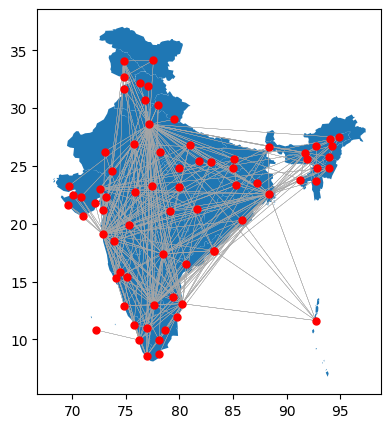

In [104]:
# Plotting the nodes only
fig, ax = plt.subplots(figsize=(5, 5))

min_thickness, max_thickness = 0.2, 5
min_weight, max_weight = 0, max_passengers

india.plot(ax=ax)
for G in [may2015_network]:
    for node in G.nodes():
        ax.plot(places_coordinates[node][1], places_coordinates[node][0], 'ro', markersize=5)
        
for u, v, passengersToCity2 in G.edges(data=True):
    start = places_coordinates[u]
    end = places_coordinates[v]
    weight = passengersToCity2['PASSENGERS TO CITY 2']
    thickness = min_thickness + ((weight - min_weight)/(max_weight-min_weight))*max_thickness
    ax.arrow(start[1],  start[0], end[1]-start[1], end[0]-start[0], alpha=0.8, linewidth= thickness, length_includes_head=True, fc='black', ec='darkgray')

In [105]:
# networks_list = [jan2016_network, feb2016_network, mar2016_network, apr2016_network, may2016_network, jun2016_network, jul2016_network, aug2016_network, sep2016_network, oct2016_network, nov2016_network, dec2016_network, year2016_network, jan2017_network, feb2017_network, mar2017_network, apr2017_network, may2017_network, jun2017_network, jul2017_network, aug2017_network, sep2017_network, oct2017_network, nov2017_network, dec2017_network, year2017_network, jan2018_network, feb2018_network, mar2018_network, apr2018_network, may2018_network, jun2018_network, jul2018_network, aug2018_network, sep2018_network, oct2018_network, nov2018_network, dec2018_network, year2018_network, jan2019_network, feb2019_network, mar2019_network, apr2019_network, may2019_network, jun2019_network, jul2019_network, aug2019_network, sep2019_network, oct2019_network, nov2019_network, dec2019_network, year2019_network, jan2020_network, feb2020_network, mar2020_network, apr2020_network, may2020_network, jun2020_network, jul2020_network, aug2020_network, sep2020_network, oct2020_network, nov2020_network, dec2020_network, year2020_network, jan2021_network, feb2021_network, mar2021_network, apr2021_network, may2021_network, jun2021_network, jul2021_network, aug2021_network, sep2021_network, oct2021_network, nov2021_network, dec2021_network, year2021_network, jan2022_network, feb2022_network, mar2022_network, apr2022_network, may2022_network, jun2022_network, jul2022_network, aug2022_network, sep2022_network, oct2022_network, nov2022_network, dec2022_network, year2022_network, jan2023_network, feb2023_network, mar2023_network, apr2023_network, may2023_network, jun2023_network, jul2023_network, aug2023_network, sep2023_network, oct2023_network, nov2023_network, dec2023_network, year2023_network]

In [106]:
min_thickness, max_thickness = 0.2, 5
min_weight, max_weight = 0, max_passengers

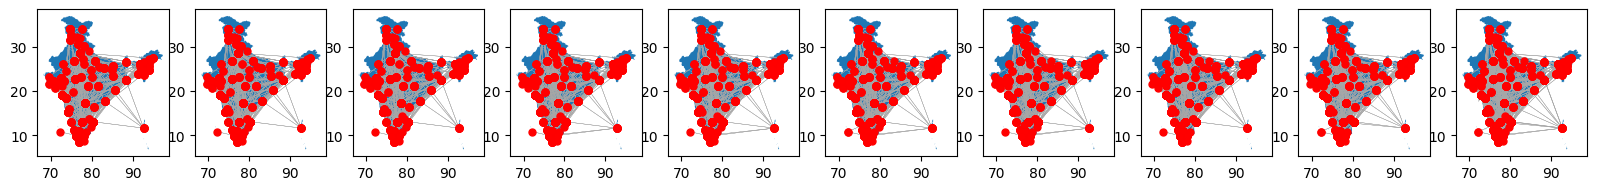

In [107]:
fig, ax = plt.subplots(1, 10, figsize=(20, 5))
# Year 2015
for i, G in enumerate([apr2015_network, may2015_network, jun2015_network, jul2015_network, aug2015_network, sep2015_network, oct2015_network, nov2015_network, dec2015_network, year2015_network]):
    india.plot(ax=ax[i])
    for u, v, passengersToCity2 in G.edges(data=True):
        ax[i].plot(places_coordinates[u][1], places_coordinates[u][0], 'ro', markersize=5)
        start = places_coordinates[u]
        end = places_coordinates[v]
        weight = passengersToCity2['PASSENGERS TO CITY 2']
        thickness = min_thickness + ((weight - min_weight)/(max_weight-min_weight))*max_thickness
        ax[i].arrow(start[1],  start[0], end[1]-start[1], end[0]-start[0], alpha=0.8, linewidth= thickness, length_includes_head=True, fc='black', ec='darkgray')

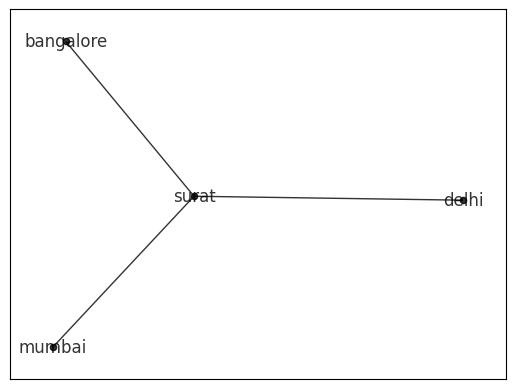

In [108]:
dummy_df = pd.DataFrame({'CITY 1': ['surat', 'surat', 'delhi'], 'CITY 2': ['bangalore', 'mumbai', 'surat'], 'PASSENGERS TO CITY 2': [100, 200, 300], 'PASSENGERS FROM CITY 2': [100, 200, 300], "LAT1": [1, 2, 3], "LONG1": [1, 2, 3], "LAT2": [1, 2, 3], "LONG2": [1, 2, 3]})

G = nx.from_pandas_edgelist(dummy_df, 'CITY 1', 'CITY 2', 'PASSENGERS TO CITY 2')
nx.draw_networkx(G, pos=nx.spring_layout(G), node_size=20, node_color='black', alpha=0.8, with_labels=True)



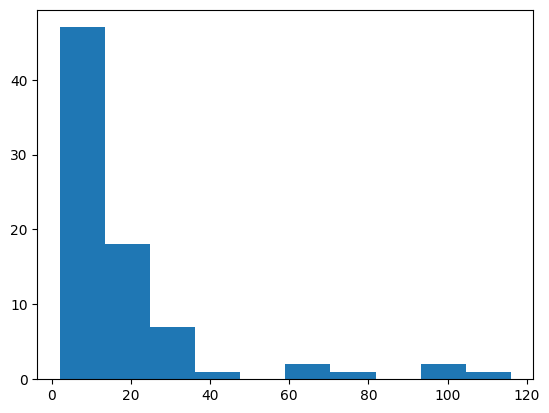

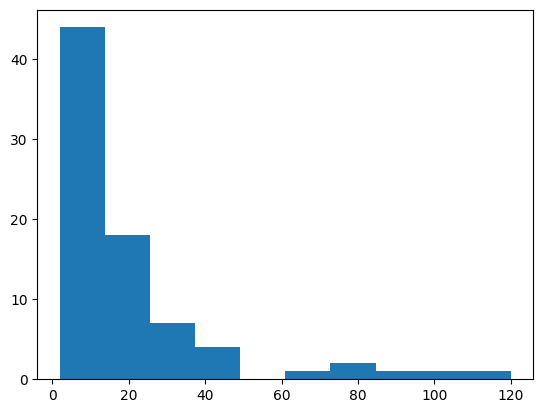

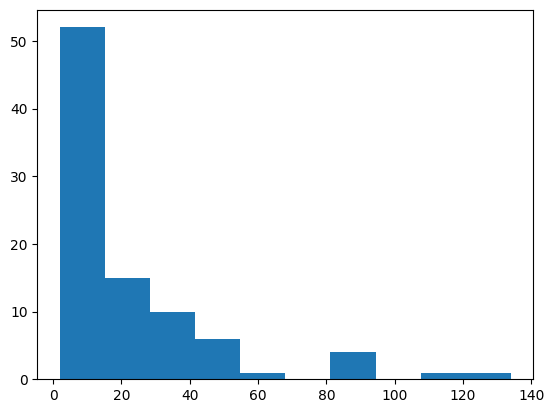

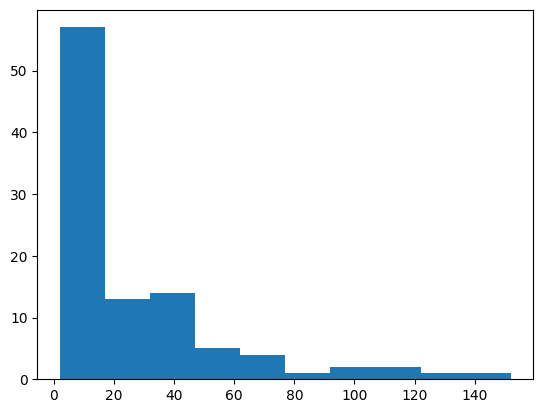

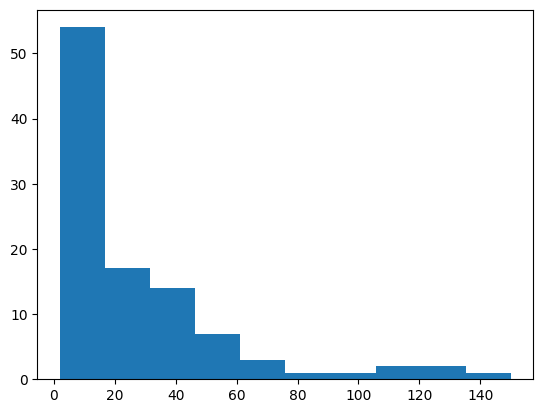

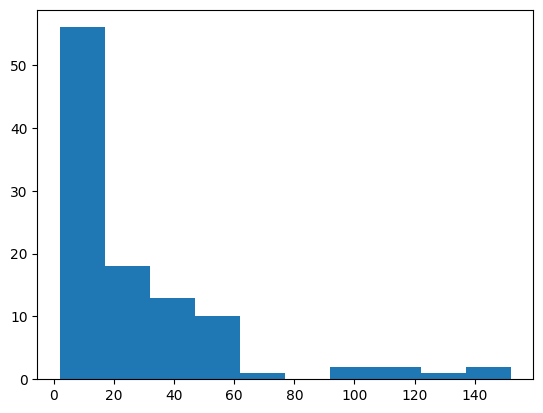

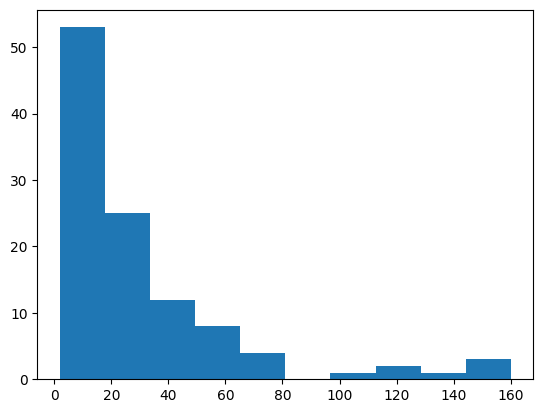

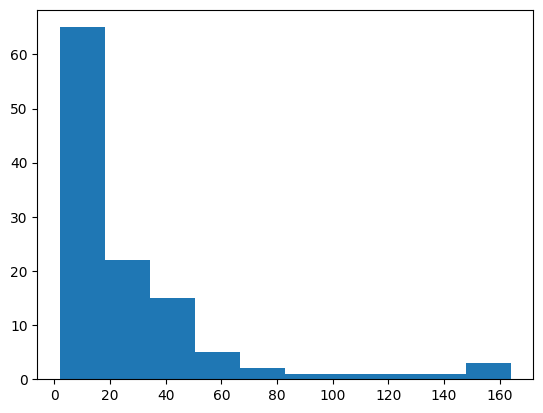

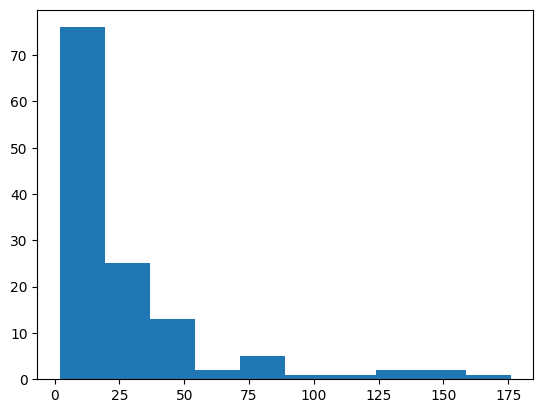

In [109]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(year2015_network)
plot_degree_dist(year2016_network)
plot_degree_dist(year2017_network)
plot_degree_dist(year2018_network)
plot_degree_dist(year2019_network)
plot_degree_dist(year2020_network)
plot_degree_dist(year2021_network)
plot_degree_dist(year2022_network)
plot_degree_dist(year2023_network)

In [110]:
! pip install powerlaw

Calculating best minimal value for power law fit


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16992\4015567878.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(degree_count, 'b-', marker='o', linestyle='None')


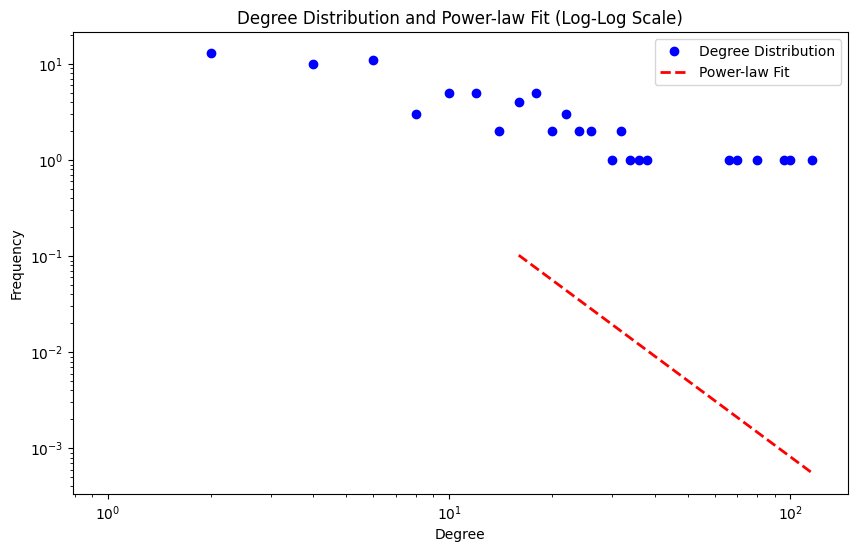

Power-law fit parameters:
Alpha: 2.6371198679407906
Likelihood ratio test p-value: 0.10171726815614879
Kolmogorov-Smirnov test p-value: <bound method Distribution.KS of <powerlaw.Power_Law object at 0x00000144AB2F2750>>


In [111]:
import powerlaw

degree_sequence = sorted([d for n, d in year2015_network.degree()], reverse=True)
degree_count = nx.degree_histogram(year2015_network)

# Fit a power-law distribution to the degree distribution
fit = powerlaw.Fit(degree_sequence)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.loglog(degree_count, 'b-', marker='o', linestyle='None')
fit.power_law.plot_pdf(color='r', linestyle='--', linewidth=2)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution and Power-law Fit (Log-Log Scale)')
plt.legend(['Degree Distribution', 'Power-law Fit'])
plt.show()

# Assess the goodness-of-fit
print("Power-law fit parameters:")
print("Alpha:", fit.power_law.alpha)
print("Likelihood ratio test p-value:", fit.power_law.D)
print("Kolmogorov-Smirnov test p-value:", fit.power_law.KS)

In [112]:
G = [year2015_network, year2016_network, year2017_network, year2018_network, year2019_network, year2020_network, year2021_network, year2022_network, year2023_network]

# Calculate degree centrality for all nodes
for g in G:
    degree_centrality = nx.degree_centrality(g)

    # Find the maximum degree centrality
    max_degree_centrality = max(degree_centrality.values())

    # Find the node(s) with the maximum degree centrality
    nodes_with_max_degree_centrality = [node for node, centrality in degree_centrality.items() if centrality == max_degree_centrality]

    print("Maximum degree centrality:", max_degree_centrality)
    print("Node(s) with maximum degree centrality:", nodes_with_max_degree_centrality)

Maximum degree centrality: 1.4871794871794872
Node(s) with maximum degree centrality: ['DELHI']
Maximum degree centrality: 1.5384615384615383
Node(s) with maximum degree centrality: ['DELHI']
Maximum degree centrality: 1.5056179775280898
Node(s) with maximum degree centrality: ['DELHI']
Maximum degree centrality: 1.5353535353535355
Node(s) with maximum degree centrality: ['DELHI']
Maximum degree centrality: 1.4851485148514851
Node(s) with maximum degree centrality: ['DELHI']
Maximum degree centrality: 1.4615384615384617
Node(s) with maximum degree centrality: ['DELHI']
Maximum degree centrality: 1.4814814814814814
Node(s) with maximum degree centrality: ['DELHI']
Maximum degree centrality: 1.4260869565217391
Node(s) with maximum degree centrality: ['DELHI']
Maximum degree centrality: 1.3858267716535433
Node(s) with maximum degree centrality: ['DELHI']


In [114]:
from copy import deepcopy

# Function to find the critical node in the directed network.
def find_critical_nodes_directed(G):
    G_temp = deepcopy(G)  # Create a copy of the network to manipulate without altering the original network
    initial_size = len(max(nx.strongly_connected_components(G_temp), key=len))  # Initial size of the largest strongly connected component

    loss_dict = {}  # Dictionary to store loss for each node

    for node in G_temp.nodes():
        # Temporarily remove the node
        G_removed = deepcopy(G_temp)
        G_removed.remove_node(node)

        if nx.number_strongly_connected_components(G_removed) > 0:
            # Calculate the new size of the largest strongly connected component
            largest_scc_size = len(max(nx.strongly_connected_components(G_removed), key=len))
            loss = (initial_size - largest_scc_size) / initial_size
        else:
            # If removing the node disconnects the network completely
            loss = 1

        # Store the loss for the current node
        loss_dict[node] = loss

    # Sort nodes based on loss from maximum to minimum
    sorted_nodes = sorted(loss_dict.keys(), key=lambda x: loss_dict[x], reverse=True)

    return sorted_nodes


In [115]:
import networkx as nx

def nodes_by_degree(G):
    # Calculate the degree for each node
    degrees = dict(G.degree())
    
    # Sort nodes based on their degrees in descending order
    sorted_nodes = sorted(degrees.keys(), key=lambda x: degrees[x], reverse=True)
    
    return sorted_nodes
for g in G:
    nodes_sorted_by_degree = nodes_by_degree(g)
    print("Nodes sorted by degree in descending order:")
    print(nodes_sorted_by_degree)


Nodes sorted by degree in descending order:
['DELHI', 'MUMBAI', 'BENGALURU', 'KOLKATA', 'HYDERABAD', 'CHENNAI', 'AHMEDABAD', 'GUWAHATI', 'PUNE', 'KOCHI', 'GOA', 'INDORE', 'SRINAGAR', 'VISAKHAPATNAM', 'JAIPUR', 'LUCKNOW', 'VARANASI', 'NAGPUR', 'RAIPUR', 'TRIVANDRUM', 'BHUBANESWAR', 'BHOPAL', 'COIMBATORE', 'TIRUPATI', 'KOZHIKODE', 'PORT BLAIR', 'AGARTALA', 'IMPHAL', 'CHANDIGARH', 'MANGALORE', 'BAGDOGRA', 'PATNA', 'DIBRUGARH', 'DEHRA DUN', 'MADURAI', 'RANCHI', 'VADODARA', 'AMRITSAR', 'BELGAUM', 'JABALPUR', 'VIJAYAWADA', 'UDAIPUR', 'AURANGABAD', 'COCHIN', 'JAMMU', 'AGRA', 'KHAJURAHO', 'AIZAWL', 'JODHPUR', 'JORHAT', 'RAJAHMUNDRY', 'RAJKOT', 'DIMAPUR', 'GAYA', 'LEH', 'SILCHAR', 'AGATTI ISLAND', 'BHUJ', 'ALLAHABAD', 'DURGAPUR', 'GWALIOR', 'SURAT', 'DIU', 'PORBANDAR', 'LILABARI', 'TEZPUR', 'CUDDAPAH', 'HUBLI', 'MYSORE', 'PONDICHERRY', 'BHAVNAGAR', 'TIRUCHIRAPALLY', 'TUTICORIN', 'DHARAMSALA', 'GORAKHPUR', 'KULLU', 'PANTNAGAR', 'SHILLONG', 'JAMNAGAR']
Nodes sorted by degree in descending order:


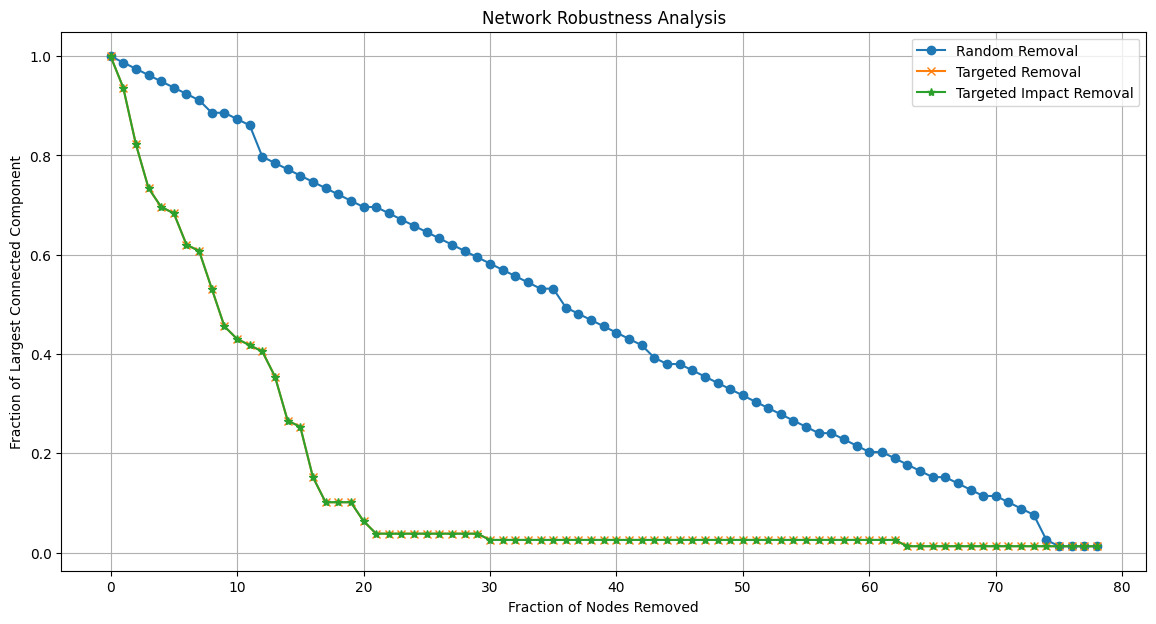

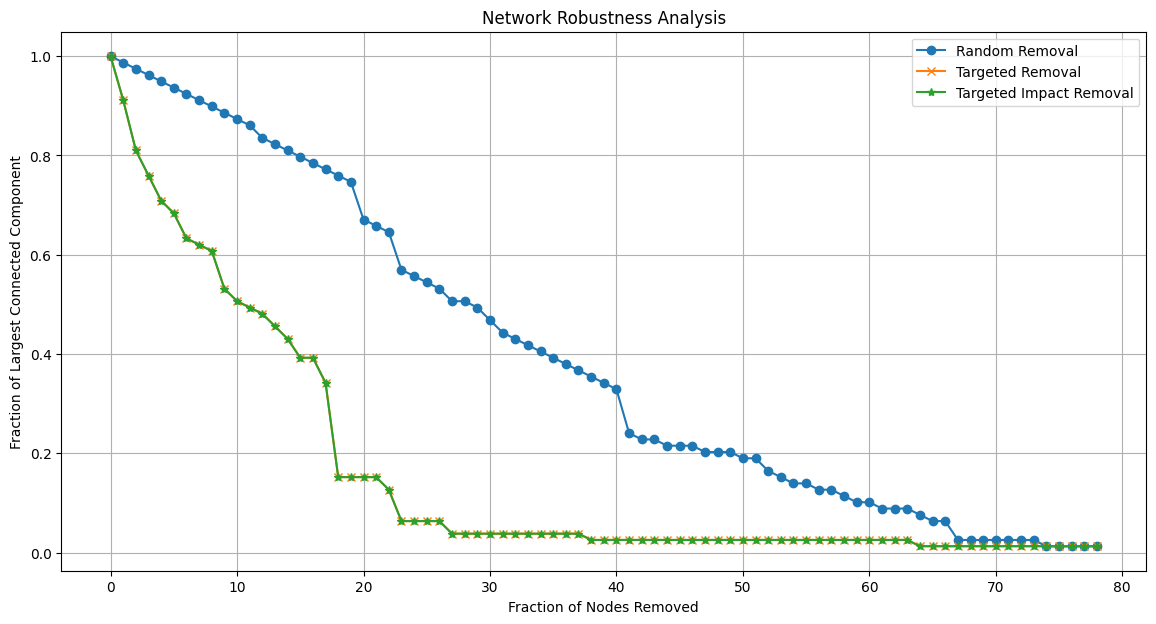

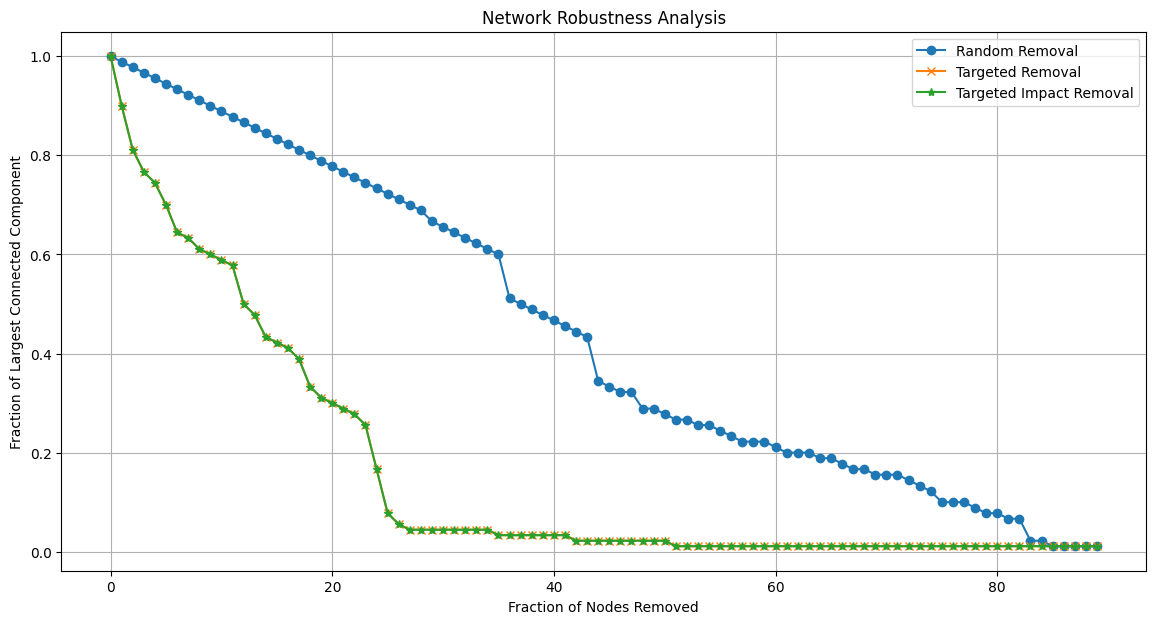

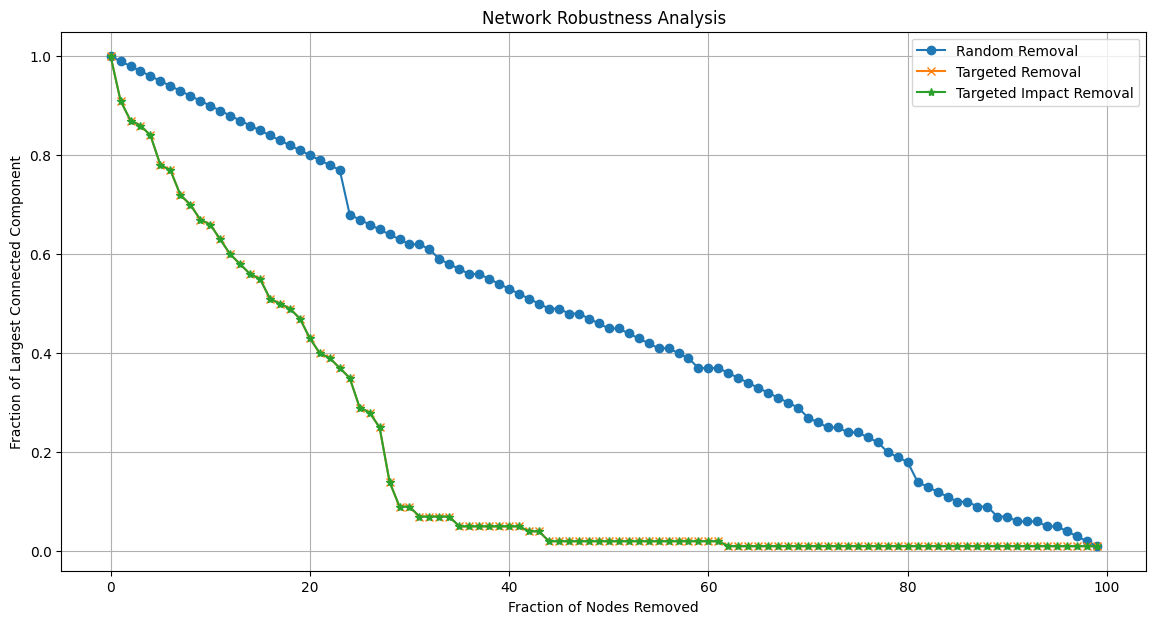

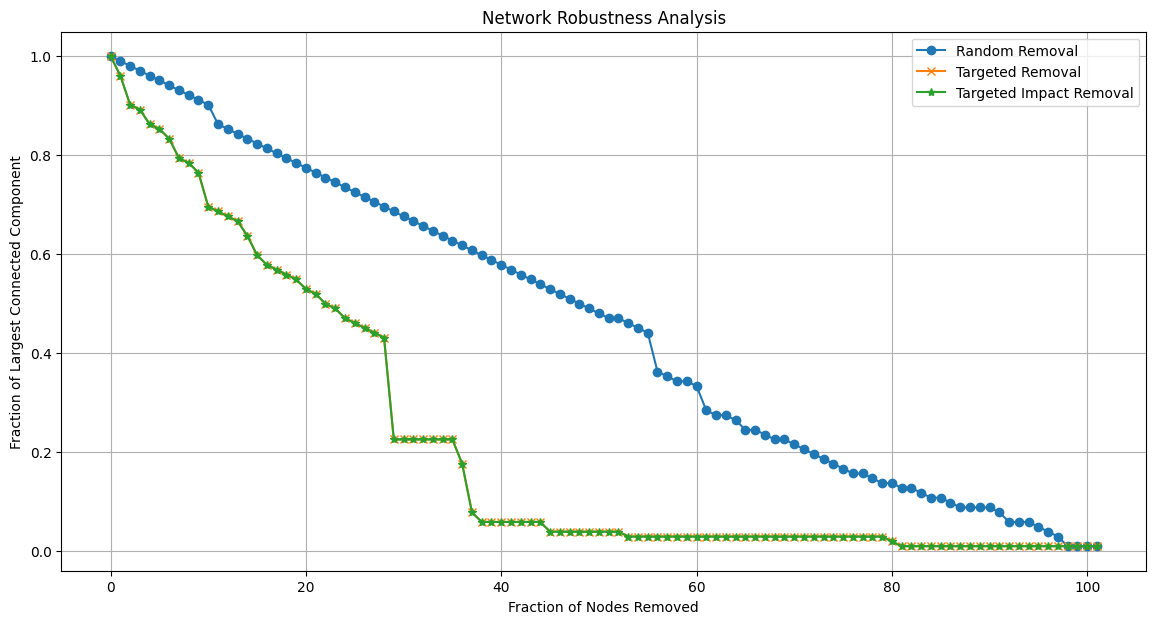

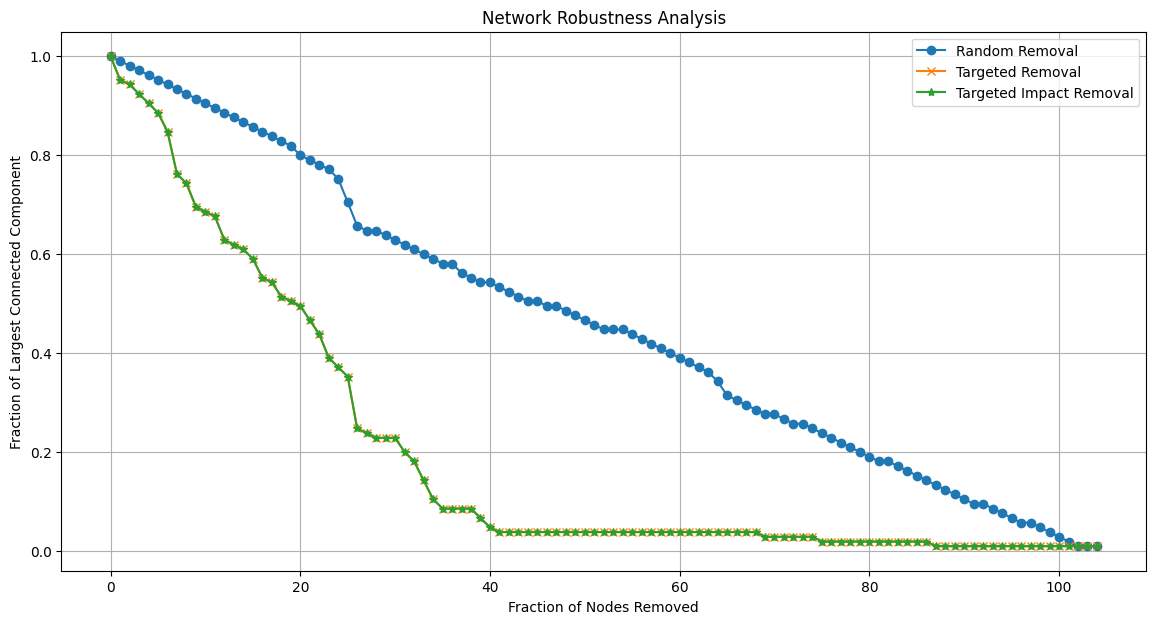

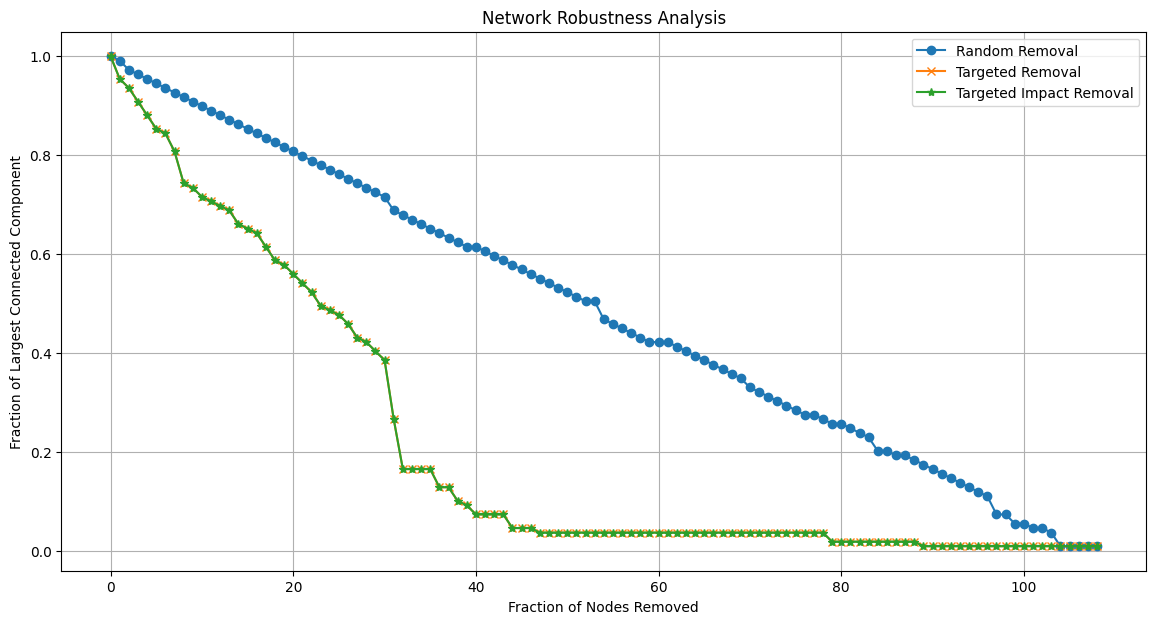

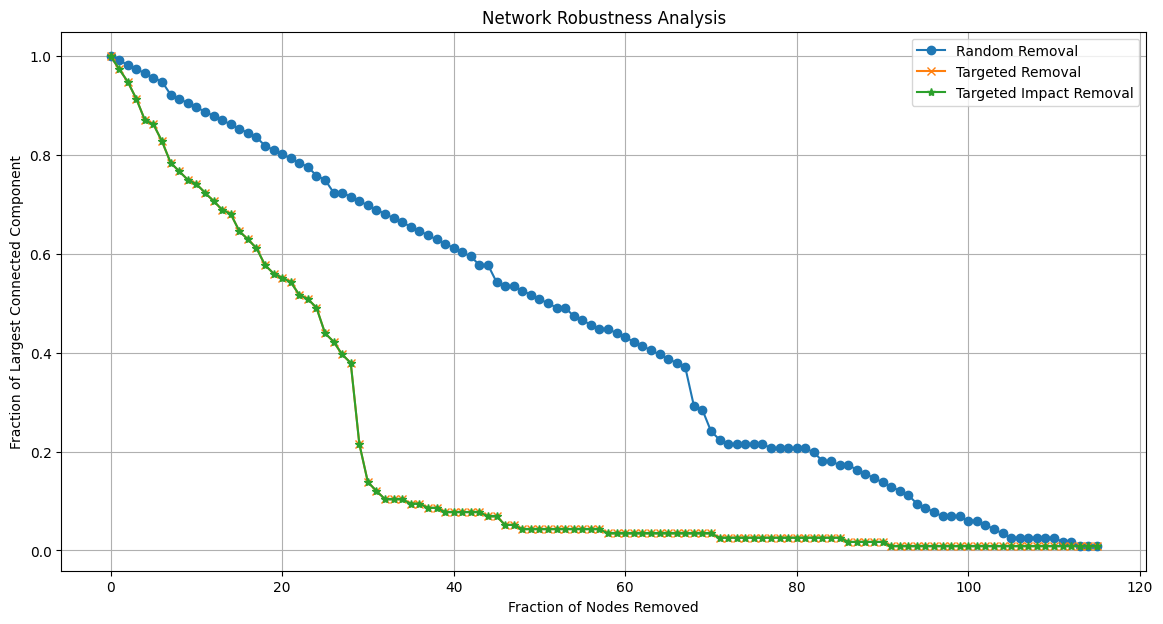

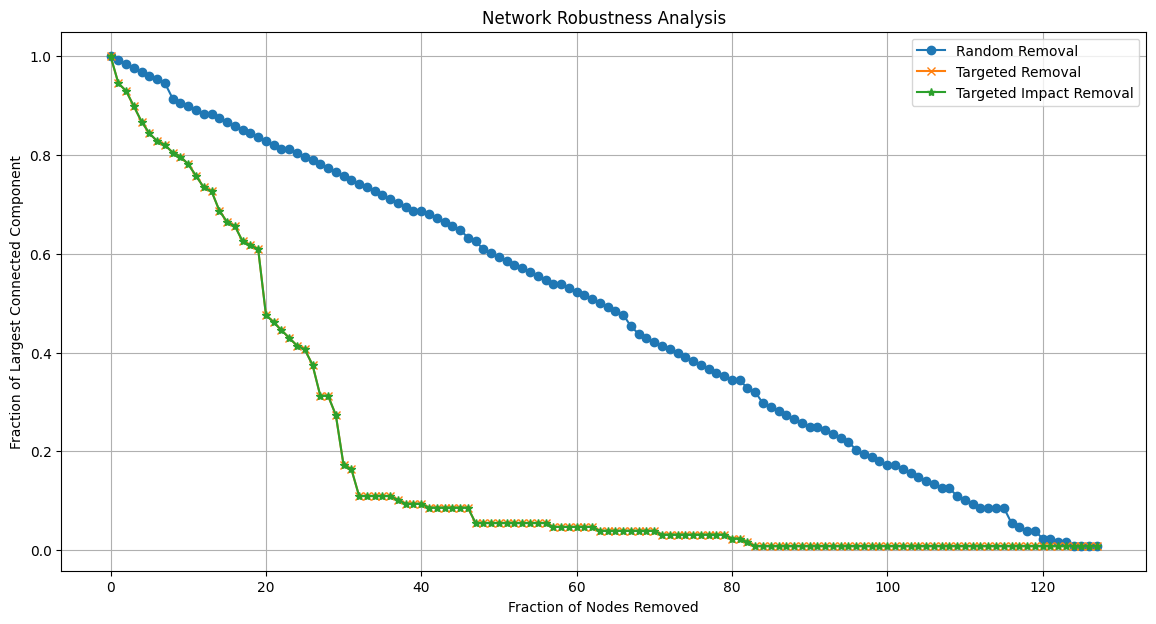

In [119]:
# Function to simulate network disintegration under targeted and random removal. We see which fraction of the largest connected component remains after removing nodes. The attack mode can be 'targeted' or 'random'. In the targeted mode, nodes are removed in decreasing order of degree. In the random mode, nodes are removed in random order.
def simulate_network_disintegration_directed(G, mode='random'):
    G_temp = deepcopy(G)  # Create a copy of the network to manipulate
    initial_size = len(max(nx.weakly_connected_components(G_temp), key=len))  # Initial size of the largest weakly connected component
    fractions = [1]  # Start with the network intact

    nodes = list(G_temp.nodes())
    if mode == 'targeted':
        # Assuming find_critical_nodes_directed sorts nodes by their criticality for strong connections
        # For weak connections, you might consider sorting by in-degree or out-degree
        critical_nodes = sorted(nodes, key=lambda n: G_temp.in_degree(n) + G_temp.out_degree(n), reverse=True)
        nodes = critical_nodes
    else:
        # Random removal
        np.random.shuffle(nodes)

    for node in nodes:
        G_temp.remove_node(node)
        if nx.number_weakly_connected_components(G_temp) > 0:
            largest_wcc_size = len(max(nx.weakly_connected_components(G_temp), key=len))
            fractions.append(largest_wcc_size / initial_size)
        else:
            break  # All nodes removed or network completely disconnected

    return fractions


for g in G:

    # Simulate disintegration for each network
    fractions_scale_free_targeted = simulate_network_disintegration_directed(g, 'targeted')
    fractions_scale_free_random = simulate_network_disintegration_directed(g, 'random')


    # Plot the results
    plt.figure(figsize=(14, 7))

    # Plot for Scale-Free Network
    plt.plot(fractions_scale_free_random, label='Random Removal', linestyle='-', marker='o')
    plt.plot(fractions_scale_free_targeted, label='Targeted Removal', linestyle='-', marker='x')
    plt.plot(fractions_scale_free_targeted, label='Targeted Impact Removal', linestyle='-', marker='*')


    plt.xlabel('Fraction of Nodes Removed')
    plt.ylabel('Fraction of Largest Connected Component')
    plt.title('Network Robustness Analysis')
    plt.legend()
    plt.grid(True)

    plt.show()

In [120]:
for g in G:    
    betweenness_centrality = nx.betweenness_centrality(g)
    closeness_centrality = nx.closeness_centrality(g)
    sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
    print(sorted_betweenness)
    print(sorted_closeness)

[('DELHI', 0.3157593473270443), ('MUMBAI', 0.2089733540136079), ('BENGALURU', 0.19535358171501424), ('KOLKATA', 0.14572132692982429), ('CHENNAI', 0.07802868334101808), ('HYDERABAD', 0.042638210787708374), ('GUWAHATI', 0.030107905361328405), ('VARANASI', 0.009799363695467593), ('KOCHI', 0.009345177614408388), ('SRINAGAR', 0.007581716023274466), ('AHMEDABAD', 0.005994336704802709), ('PUNE', 0.0044861360957029976), ('IMPHAL', 0.0031084443546980996), ('GOA', 0.002512629635506758), ('VISAKHAPATNAM', 0.002385614810689736), ('TRIVANDRUM', 0.0021507170578687292), ('JAIPUR', 0.0017372958931400491), ('INDORE', 0.0017267124409981556), ('LUCKNOW', 0.0011988011988011984), ('RAIPUR', 0.0010474974760689042), ('TIRUPATI', 0.000991997420568849), ('MANGALORE', 0.0008343819268189017), ('CHANDIGARH', 0.0007363007363007362), ('JABALPUR', 0.0006678817603187352), ('NAGPUR', 0.000642743499886357), ('JAMMU', 0.0006395720681434967), ('BHOPAL', 0.000616843473986331), ('BHUBANESWAR', 0.0006083863226720369), ('POR

In [122]:
for g in G:
    print(nx.diameter(g))
    print(nx.number_of_nodes(g))

3
79
3
79
3
90
3
100
4
102
4
105
4
109
4
116
5
128


In [130]:
def nodes_by_degree(G):
    # This function will return nodes sorted by their degree (sum of in-degree and out-degree for directed graphs)
    return sorted(G.nodes(), key=lambda x: G.degree(x), reverse=True)

def city_arrive_depart(G):
    traffic_info = {}
    top_nodes = nodes_by_degree(G)

    for node in top_nodes[:25]:  # Take top 25 nodes by degree
        passengers_departed = sum(data.get('PASSENGERS TO CITY 2', 0) for _, _, data in G.out_edges(node, data=True))
        passengers_arrived = sum(data.get('PASSENGERS TO CITY 2', 0) for _, _, data in G.in_edges(node, data=True))
        
        traffic_info[node] = {
            'passengers_departed': passengers_departed,
            'passengers_arrived': passengers_arrived
        }

    return traffic_info

city_arrive_depart(g)

{'DELHI': {'passengers_departed': 26211578, 'passengers_arrived': 23619499},
 'BENGALURU': {'passengers_departed': 16195370,
  'passengers_arrived': 16168656},
 'MUMBAI': {'passengers_departed': 9535015, 'passengers_arrived': 16782138},
 'HYDERABAD': {'passengers_departed': 9822681, 'passengers_arrived': 9009045},
 'KOLKATA': {'passengers_departed': 8287384, 'passengers_arrived': 7940730},
 'CHENNAI': {'passengers_departed': 7387872, 'passengers_arrived': 6511330},
 'AHMEDABAD': {'passengers_departed': 4954824, 'passengers_arrived': 4858322},
 'JAIPUR': {'passengers_departed': 2323020, 'passengers_arrived': 1938798},
 'INDORE': {'passengers_departed': 1676790, 'passengers_arrived': 1406978},
 'PUNE': {'passengers_departed': 4770479, 'passengers_arrived': 4761551},
 'GUWAHATI': {'passengers_departed': 2922041, 'passengers_arrived': 2853017},
 'LUCKNOW': {'passengers_departed': 2643252, 'passengers_arrived': 2362880},
 'GOA': {'passengers_departed': 888930, 'passengers_arrived': 1080522}